In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle

In [2]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
## Dropping irrelevant features
df=df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
## Encoding categorical variables
label_encoder_gender= LabelEncoder()
df['Gender']=label_encoder_gender.fit_transform(df['Gender'])

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [7]:
## Applying one hot encoding to Geography column
from sklearn.preprocessing import OneHotEncoder
onehotencoder_geo=OneHotEncoder()
geo_encoder= onehotencoder_geo.fit_transform(df[['Geography']])
geo_encoder

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 3)>

In [8]:
geo_encoder.toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [9]:
onehotencoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [10]:
geo_encoded_df=pd.DataFrame(geo_encoder.toarray(),columns=onehotencoder_geo.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [11]:
## Joining the encoded df to orginal df
df=pd.concat([df.drop('Geography',axis=1),geo_encoded_df],axis=1)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [14]:
## Save the encoders and scalers
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)

with open('onehotencoder_geo.pkl','wb') as file:
    pickle.dump(onehotencoder_geo,file)

In [12]:
## Divide the dataset into dependent and independent features
X=df.drop('Exited',axis=1)
y=df['Exited']

##Split the data into training and testing set
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Scaling the numerical features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [17]:
## Saving the scaler file as pickle file
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [49]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to X_train and y_train
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class distribution after resampling
from collections import Counter
print("Resampled class distribution:", Counter(y_train_resampled))

Resampled class distribution: Counter({0: 6356, 1: 6356})


### ANN Implementation

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [20]:
## Building ANN model
model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)), ## first hidden layer
    Dense(32,activation='relu'), ## Second hidden layer
    Dense(1,activation='sigmoid') ## Output layer
])


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)


In [24]:
## Compiling the model
model.compile(optimizer=opt,loss='binary_crossentropy',metrics= ['accuracy'])

In [26]:
## Setting up the tensorboard
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

log_dir='logs/fit'+datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorflow_callback=TensorBoard()

In [29]:
## Setting up early stopping
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

In [30]:
## Training the model
history=model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8728 - loss: 0.3094 - val_accuracy: 0.8630 - val_loss: 0.3404
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8710 - loss: 0.3223 - val_accuracy: 0.8575 - val_loss: 0.3406
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8609 - loss: 0.3290 - val_accuracy: 0.8605 - val_loss: 0.3583
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8646 - loss: 0.3272 - val_accuracy: 0.8575 - val_loss: 0.3449
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8671 - loss: 0.3249 - val_accuracy: 0.8645 - val_loss: 0.3451
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8796 - loss: 0.3000 - val_accuracy: 0.8640 - val_loss: 0.3442
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8651 - loss: 0.3210 - val_accuracy: 0.8570 - val_loss: 0.3458
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8706 - loss: 0.3124 - val_acc

In [ ]:
## Saving the model
model.save('model.h5')

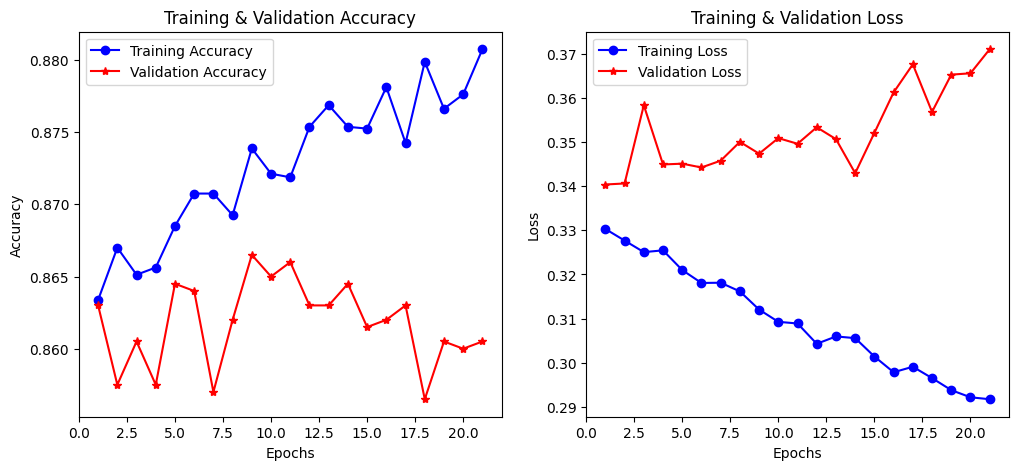

In [41]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output of model.fit()
def plot_training_history(history):
    # Extracting values
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot Accuracy
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training & Validation Loss')
    plt.legend()

    plt.show()

# Call this function after training your model
plot_training_history(history)

In [51]:
import shutil

# Remove old results
shutil.rmtree('keras_tuner_results', ignore_errors=True)

In [52]:
## Applying keras tuner to get efficient parameters and get a good model
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential()
    
    # Input layer
    model.add(Dense(hp.Int('units_input', min_value=32, max_value=256, step=32), 
                    activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())  # Apply batch normalization
    model.add(Dropout(hp.Float('dropout_input', min_value=0.1, max_value=0.9, step=0.1)))  # Apply dropout
    
    # Hidden layers (Keras Tuner will decide the number)
    for i in range(hp.Int('num_layers', min_value=1, max_value=8)):  # Between 1 to 3 hidden layers
        model.add(Dense(hp.Int(f'units_{i}', min_value=32, max_value=256, step=32), activation='relu'))
        model.add(BatchNormalization())  # Apply batch normalization
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.9, step=0.1)))  # Apply dropout
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))  
    
    # Compile model
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.01,0.001, 0.0005, 0.0001])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Initialize Keras Tuner (Hyperband is a good choice)
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=20,
                     factor=3,
                     directory='keras_tuner_results',
                     project_name='ann_tuning')

# Search for the best hyperparameters
tuner.search(X_train_resampled, y_train_resampled, epochs=20, validation_data=(X_test, y_test), batch_size=32)

# Get the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
best_model.fit(X_train_resampled, y_train_resampled, epochs=30, validation_data=(X_test, y_test), batch_size=32)


Trial 30 Complete [00h 00m 34s]
val_accuracy: 0.8034999966621399

Best val_accuracy So Far: 0.843999981880188
Total elapsed time: 00h 05m 52s
Epoch 1/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6387 - loss: 0.7412 - val_accuracy: 0.7295 - val_loss: 0.5313
Epoch 2/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7276 - loss: 0.5518 - val_accuracy: 0.8305 - val_loss: 0.4223
Epoch 3/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7581 - loss: 0.5063 - val_accuracy: 0.7855 - val_loss: 0.4552
Epoch 4/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7598 - loss: 0.4974 - val_accuracy: 0.8095 - val_loss: 0.4450
Epoch 5/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7633 - loss: 0.4952 - val_accuracy: 0.7455 - val_loss: 0.4897
Epoch 6/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7723 - loss: 0.4825 - val_accuracy: 0.7335 - val_loss: 0.5332
Epoch 7/30
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7686 - loss: 0.4857 - va

#### Classification report of model implemented using keras tuner

In [54]:
from sklearn.metrics import classification_report

# Get predictions on test data
y_pred_prob = best_model.predict(X_test)

# Convert probabilities to binary (Threshold = 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate and print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.75      0.83      1607
           1       0.43      0.77      0.55       393

    accuracy                           0.75      2000
   macro avg       0.68      0.76      0.69      2000
weighted avg       0.83      0.75      0.77      2000



#### Classification report of model implemented without using keras tuner

In [56]:
from sklearn.metrics import classification_report

# Get predictions on test data
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary (Threshold = 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate and print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.52      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

